In [1]:
# İlgili Kütüphane ve fonksiyonları yüklüyoruz

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/kaggle/input/hr-comma-sepcsv/HR_comma_sep.csv')

In [3]:
# Toplu halde dosyaya göz atıyoruz.

def check_df(dataframe, head=5):
    print("######################  Shape  #####################")
    print(dataframe.shape)
    print("######################  Types  #####################")
    print(dataframe.dtypes)
    print("######################  Head  ######################")
    print(dataframe.head(head))
    print("####################### Tail #######################")
    print(dataframe.tail(head))
    print("#######################  NA  #######################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe().T)

check_df(df)

######################  Shape  #####################
(14999, 10)
######################  Types  #####################
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object
######################  Head  ######################
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   t

In [4]:
# "sales" sütunun adı garip ve uyumsuz geldiğinden sütunun adını "department" olarak değiştiriyoruz.

df.rename(columns={'sales': 'departments'}, inplace=True)

In [5]:
# Kategorik değişkenlere sayılar vererek değiştiriyoruz.

df['salary'] = df['salary'].map({'low' : 0, 'medium' : 1, 'high' : 2})

In [6]:
df['departments'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['departments'].value_counts()

departments
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [8]:
df['salary'].value_counts()

salary
0    7316
1    6446
2    1237
Name: count, dtype: int64

In [9]:
table = df.groupby(['departments', 'salary'])['satisfaction_level'].count().unstack()
table

salary,0,1,2
departments,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


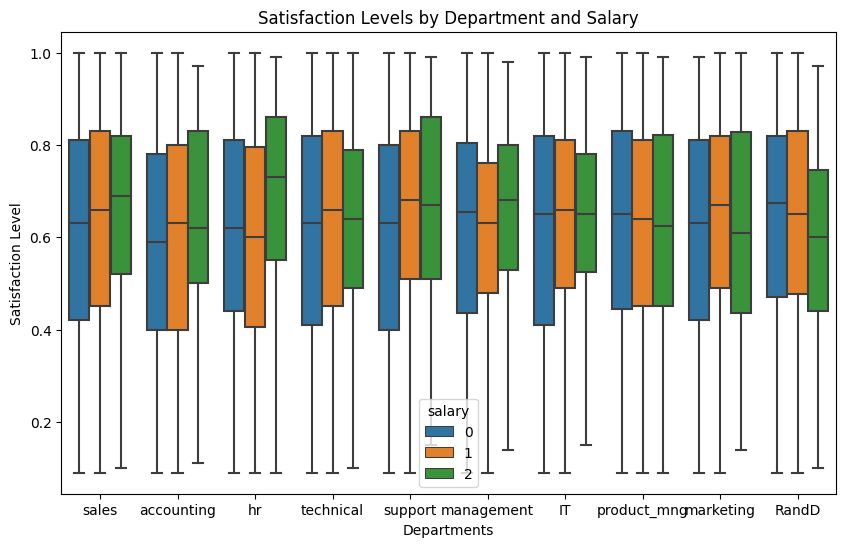

In [10]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'departments', y= 'satisfaction_level', hue= 'salary', data = df)
plt.xlabel('Departments')
plt.ylabel('Satisfaction Level')
plt.show()

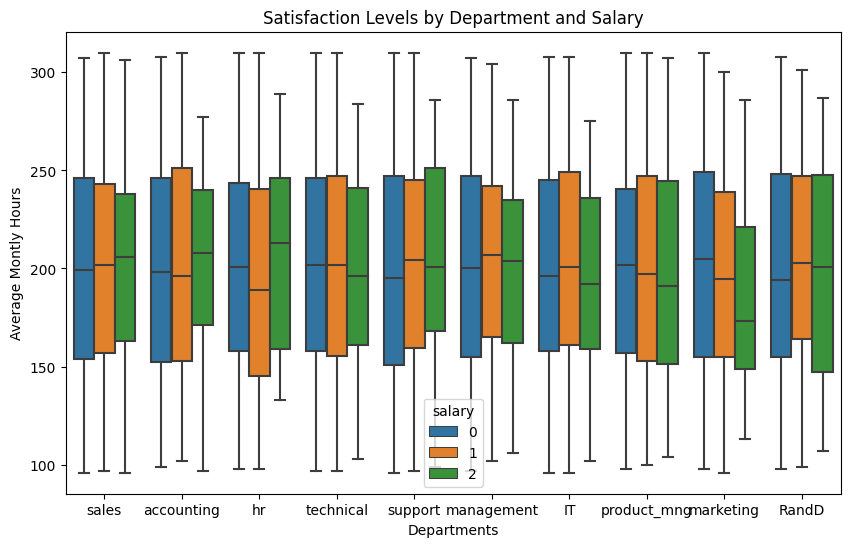

In [11]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'departments', y= 'average_montly_hours', hue= 'salary', data = df)
plt.xlabel('Departments')
plt.ylabel('Average Montly Hours')
plt.show()

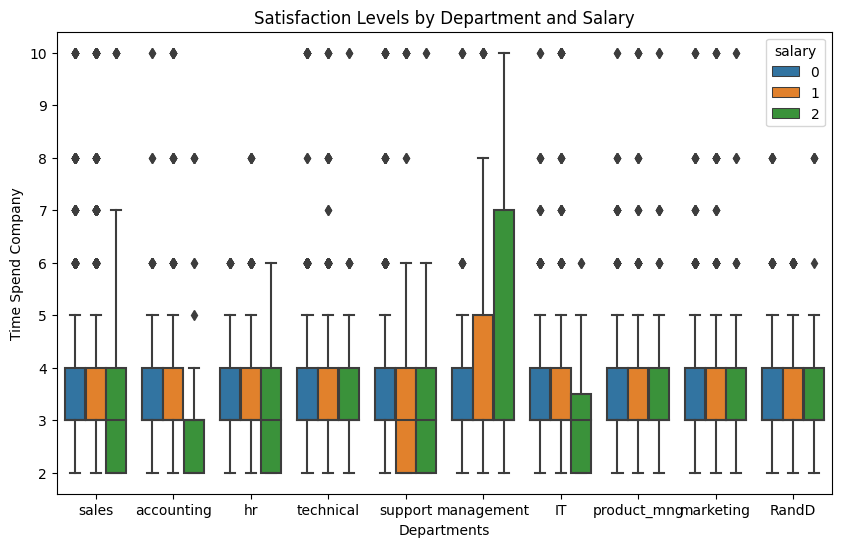

In [12]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'departments', y= 'time_spend_company', hue= 'salary', data = df)
plt.xlabel('Departments')
plt.ylabel('Time Spend Company')
plt.show()

In [13]:
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


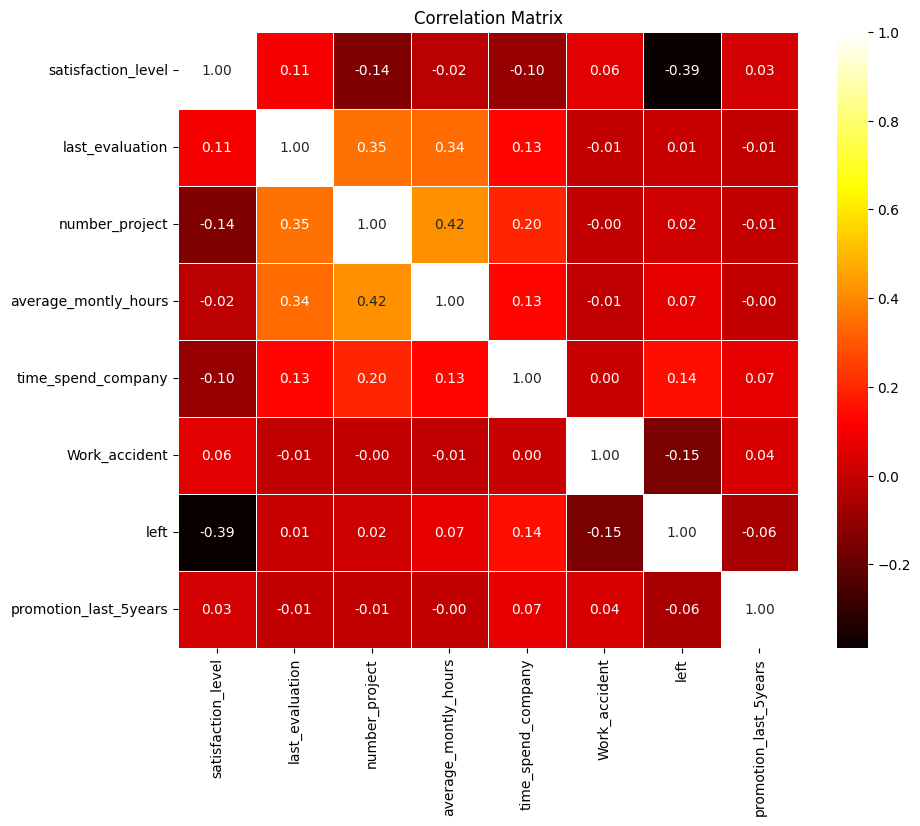

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
left = df['left'].value_counts()[1]
stayed = df['left'].value_counts()[0]

left_percentage = (left /(left+stayed)*100)
stayed_percentage = (stayed / (left+stayed)*100)
print('Left Percentage: ',left_percentage)
print('Stayed Percentage: ',stayed_percentage)

Left Percentage:  23.80825388359224
Stayed Percentage:  76.19174611640777


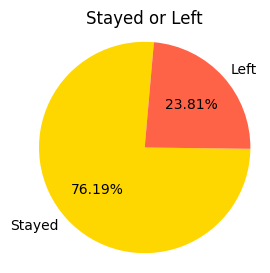

In [16]:
plt.figure(figsize = (3,3))
labels = ['Stayed','Left']
sizes = [stayed, left]
plt.pie(sizes, labels=labels, autopct = '%1.2f%%', colors = ['gold','tomato'], startangle = 85)
plt.title('Stayed or Left')
plt.axis('equal')
plt.show()

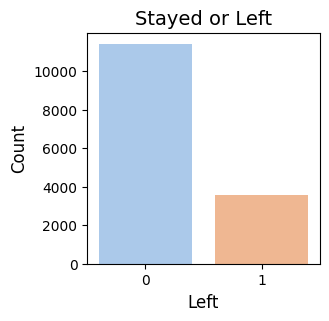

In [17]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='left', palette='pastel')
plt.title('Stayed or Left', fontsize=14)
plt.xlabel('Left', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### First Hypothesis

Is the reason for employees to leave the company salary?

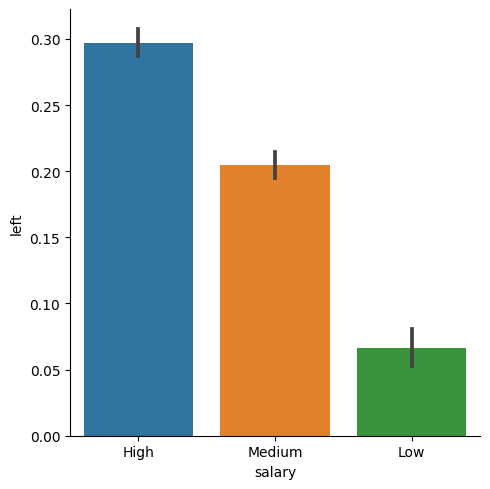

In [18]:
bar =sns.catplot(x='salary', y='left', kind='bar', data=df, palette ='tab10')
bar.set_xticklabels(['High', 'Medium', 'Low']);

See the graph of salaries according to departments

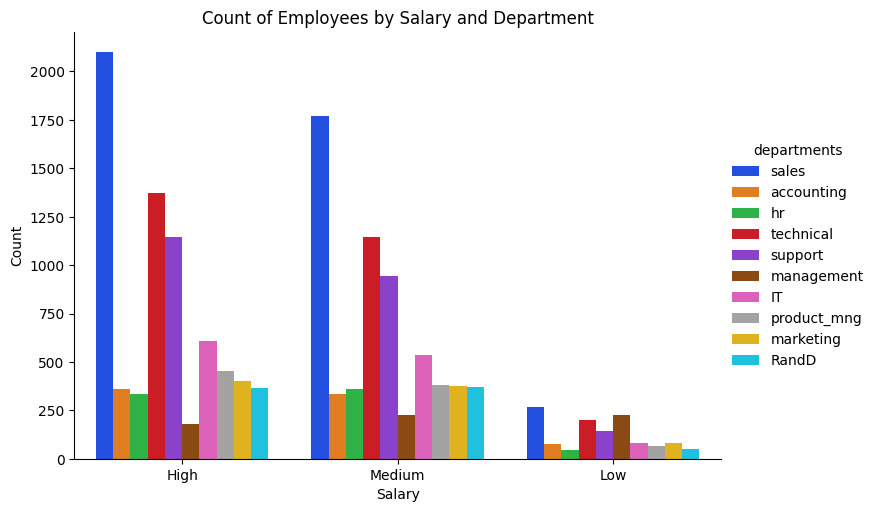

In [19]:
salary_names = ['High', 'Medium', 'Low']
table2 = sns.catplot(x='salary', hue='departments', kind='count', height=5, aspect=1.5, data=df, palette='bright')
table2.set_axis_labels('Salary', 'Count')
plt.title('Count of Employees by Salary and Department')
table2.set_xticklabels(salary_names)
plt.show()

In the graphic(Salary Comparison):

It shows that salaries in Sales, Technical and Product Management departments are higher than other departments.
It shows that salaries in Accounting, Human Resources, Support and Marketing departments are lower than other departments.

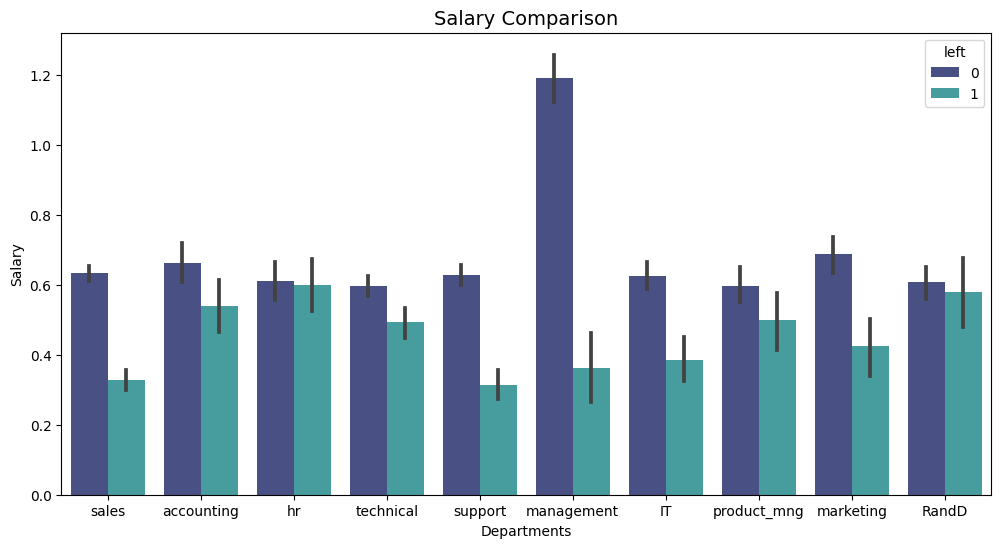

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'departments', y='salary', hue='left', data=df, palette= 'mako')
plt.title('Salary Comparison', fontsize = 14)
plt.xlabel('Departments')
plt.ylabel('Salary')
plt.show()

### Second Hypothesis

Are employees leaving the company because the job is not safe?

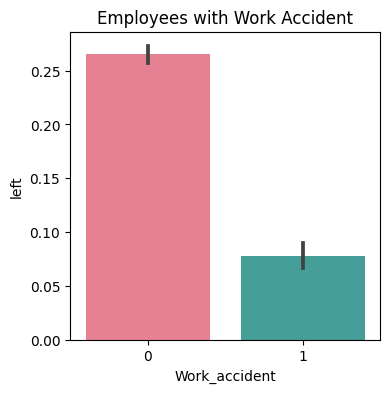

In [21]:
plt.figure(figsize=(4, 4))
sns.barplot(x='Work_accident', y='left', data=df, palette='husl')
plt.title('Employees with Work Accident')
plt.show()

Approximately 14% of the employees had occupational accidents, out of this high number of accidents only 169 employees left the company due to occupational accidents. Therefore, this hypothesis is rejected.



In [22]:
print(df.Work_accident.sum())
print(df.Work_accident.mean())
print((df[df['left']==1]['Work_accident']).sum())

2169
0.1446096406427095
169


### Third Hypothesis¶
Is this company a good place to grow professionally?

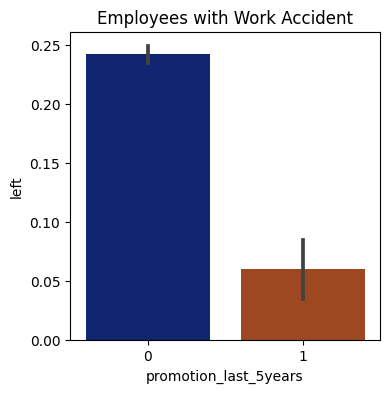

In [23]:
plt.figure(figsize=(4, 4))
sns.barplot(x='promotion_last_5years', y='left', data=df, palette='dark')
plt.title('Employees with Work Accident')
plt.show()

Only 319 employees have been promoted in the last five years This may seem like a problem. When it is difficult to get promoted, many employees lose motivation, start looking for a new job and left their company.


In [24]:
print(df.promotion_last_5years.sum())
print(df.promotion_last_5years.mean())

319
0.021268084538969265


As can be seen, 2 percent

#### Years in the company

In the graphic 'Years in the company' we can identify an important characteristic.

Employees with 7 or more years didn't left, maybe because with the passing of the years they are more confortable and not so interested in look for a new challenge in other company.
The problem starts when the employees have more than 3 years and get worst when they achieve 5 years.
It is too early to say that the difficult to get promoted is the main reason for the leaving of the employees, but more research is needed.

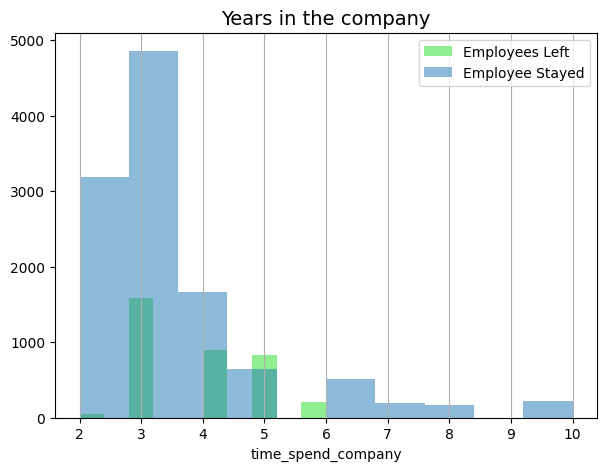

In [25]:
plt.figure(figsize =(7,5))
plt.hist(df[df['left']==1]['time_spend_company'], alpha=1, label='Employees Left',color = 'lightgreen')
plt.hist(df[df['left']==0]['time_spend_company'], alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

### Performance Analysis
There are 2 types of groups: a group of low-performing employees and a group of high-performing employees. It is natural that employees who do not work well leave the company, but the real problem is that high-performing employees also leave. So how can we understand why this happens?

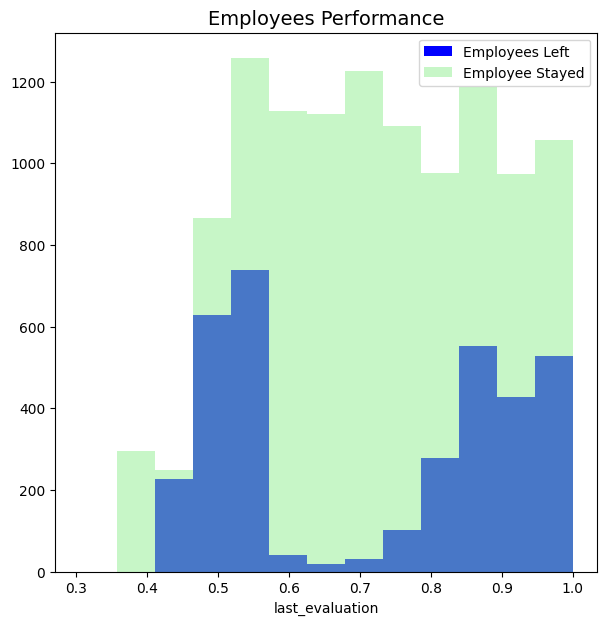

In [26]:
plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left', color= 'blue')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed', color = 'lightgreen')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');

In [27]:
poor_performance_left = df[(df.last_evaluation <= 0.62)&(df.number_project ==2)&(df.left ==1)]
len(poor_performance_left)

1531

In [28]:
poor_performance_stayed = df[(df.last_evaluation >0.62)&(df.number_project == 2)&(df.left==1)]
len(poor_performance_stayed)

36

In [29]:
high_performance_left = df[(df.last_evaluation <= 0.62)&(df.number_project >=5)&(df.left ==1)]
len(high_performance_left)

47

In [30]:
high_performance_stayed = df[(df.last_evaluation > 0.8)&(df.number_project >=5)&(df.left ==0)]
len(high_performance_stayed)

889

In [31]:
print('poor_performance_left:',len(poor_performance_left))
print('high_performance_left:',len(high_performance_left))
print('poor_performance_stayed:',len(poor_performance_stayed))
print('high_performance_stayed', len(high_performance_stayed))

poor_performance_left: 1531
high_performance_left: 47
poor_performance_stayed: 36
high_performance_stayed 889


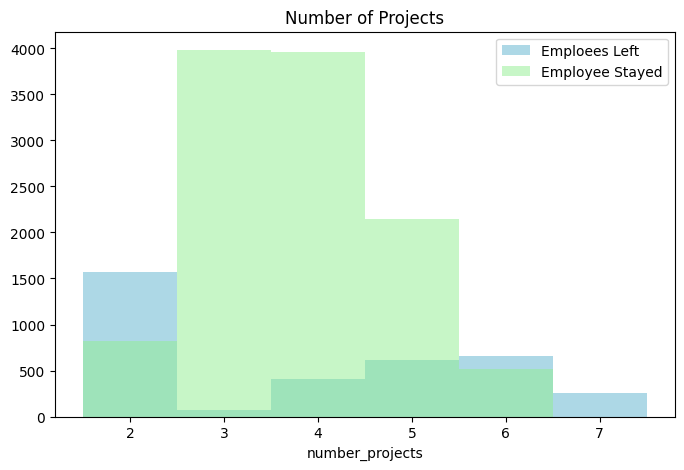

In [32]:
plt.figure(figsize = (8,5))
bins = np.linspace(1.5,7.5,7) # 1.5 ile 7.5 arasında 7 değer üret
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Emploees Left', color='lightblue')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha=0.5, label='Employee Stayed', color = 'lightgreen')
plt.title('Number of Projects')
plt.xlabel('number_projects')
plt.legend(loc='best');

#### Working Hours
Comparison of a group working fewer hours with a group working more hours compared to average working hours

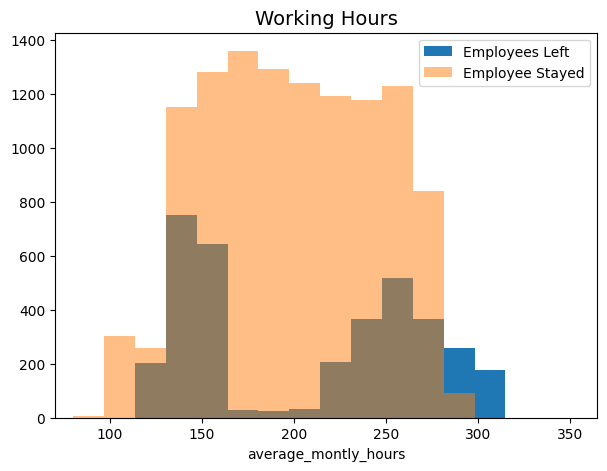

In [33]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(df[df['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

As can be seen, employees with 6 or more projects work 20 per cent more hours on average.

/tmp/ipykernel_18/2753982700.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_number_projects = df.groupby('number_project')['average_montly_hours'].mean()


number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


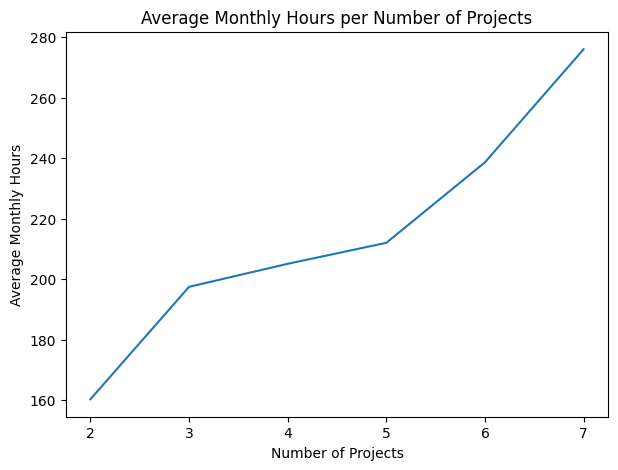

In [34]:
df['number_project'] = df['number_project'].astype('category')
df['average_montly_hours'] = df['average_montly_hours'].astype(float)
groupby_number_projects = df.groupby('number_project')['average_montly_hours'].mean()
print(groupby_number_projects)

plt.figure(figsize=(7, 5))
groupby_number_projects.plot()
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours per Number of Projects')
plt.show()

Employees who left the company with the above information are grouped as follows:

Employees with 2 projects and working less than the company average.
Employees with 5 or more projects and working at least 20% more than the average.

#### Satisfaction Level
It is possible to see 3 interesting peaks in the satisfaction levels of employees leaving the company.

There is a peak consisting of employees who are completely disappointed.
Another peak of 0.4, representing another group with a satisfaction level below average.
And another amount in the range 0.7 to 0.9, related to employees who leave despite high satisfaction.

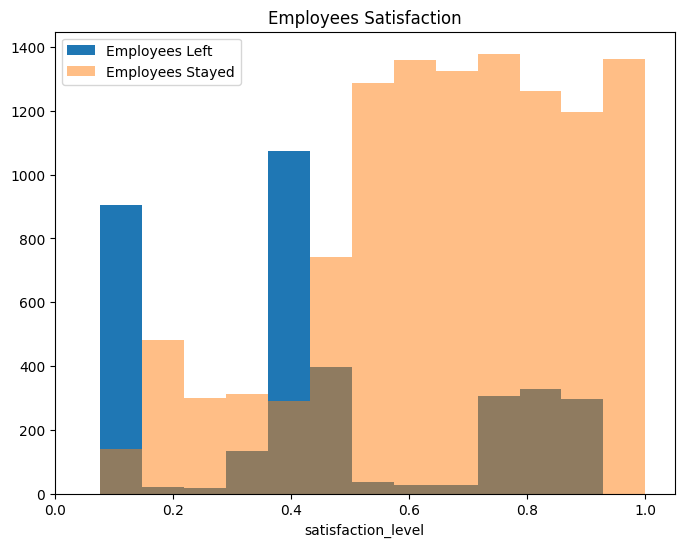

In [35]:
plt.figure(figsize=(8,6))
bins = np.linspace(0.006,1.000,15)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha=0.5, label='Employees Stayed')
plt.title('Employees Satisfaction')
plt.xlabel('satisfaction_level')
plt.xlim(0,1.05)
plt.legend(loc='best');

In [36]:
df['number_project'] = df['number_project'].astype('category')
df['average_montly_hours'] = df['average_montly_hours'].astype(float)



In [37]:
groupby_number_projects = df.groupby('number_project')['average_montly_hours'].mean()
print(groupby_number_projects)

number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


/tmp/ipykernel_18/3056883903.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_number_projects = df.groupby('number_project')['average_montly_hours'].mean()


See why your most valuable employees tend to leave

Of the employees who left with high performance, there were employees with 4 or more years in the company and 5 or more projects:

Low level of satisfaction,
I worked more hours,
I haven't been promoted in the last five years.

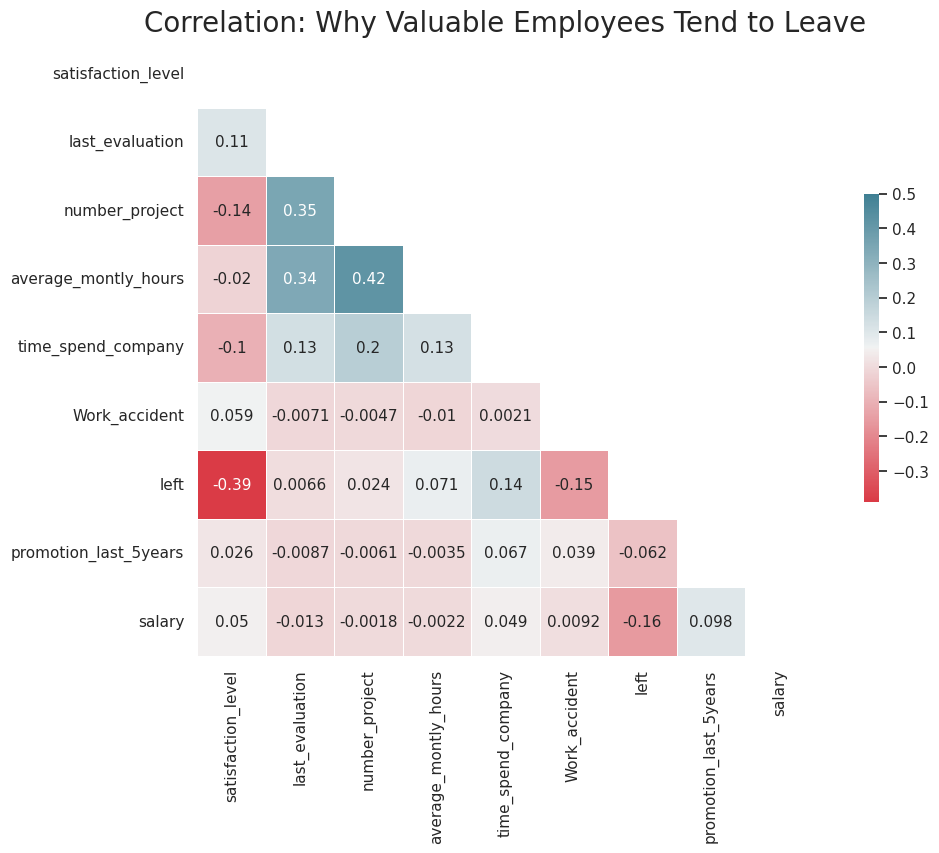

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns

func_living = df.drop(columns=categorical_columns)

corr2 = func_living.corr()

sns.set(style='white')
mask = np.zeros_like(corr2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13, 8))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=0.5, annot=True, annot_kws={'size': 11}, square=True, xticklabels=True, yticklabels=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20)
plt.show()

**Summary of the Exploratory Data Analysis**
It is a relatively young company, on average, employees have 3 or 4 years in the company and the oldest employees are working 10 years.
The biggest difference in the salary from who stayed and those who left, was found in the managemnet department, in the others departments although the salaries of who stayed be higher in average, it is not a big difference.
The number of employees that had a work accident is about 14%, of which only 169 employees left the company, so don't seem to have a correlation with the employees leaving.
In five years only 2% of the employees were promoted. Is possible that many employees get unmotivated and start planning to leave.
Employees with 7 or longer in the company didn't left. Employees with 5 years have more chances to leaving.
There are 2 distincts groups of employees performance that left. A group with poor performance with 2 projects and others with high performance with 5 or more projects. It is not necessary retain all the employees, the focus is on keeping employees with high performance.
The employees with 4 years in the company have the lowest average satisfaction level of all the company with (0.47).
The satisfaction drops when the employees are working in 5 or more projects. A number of 3 or 4 projects seems to be ideal independent of the time spend in the company.
The employees with 5 or more projects that left also worked at least 20% more hours than the average of the company.
The satisfaction level of the employees that left is grouped in totally disappointed, below the average satisfaction and satisfied.
Let's connect

In [39]:
### Thanks to WILLIAM WALTER : Human Resources Analytics: A Descriptive Analysis